<a href="https://colab.research.google.com/github/srini2805/Problem-Solving-with-Search-Simulations-in-AI/blob/main/A_and_cryptographic_puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from itertools import permutations

def solve_cryptarithmetic():
    letters = "SENDMORY"
    for perm in permutations(range(10), len(letters)):
        mapping = dict(zip(letters, perm))
        S, E, N, D, M, O, R, Y = [mapping[char] for char in letters]

        if S == 0 or M == 0:  # No leading zero
            continue

        send = S*1000 + E*100 + N*10 + D
        more = M*1000 + O*100 + R*10 + E
        money = M*10000 + O*1000 + N*100 + E*10 + Y

        if send + more == money:
            return mapping

solution = solve_cryptarithmetic()
print("Solution:", solution)



Solution: {'S': 9, 'E': 5, 'N': 6, 'D': 7, 'M': 1, 'O': 0, 'R': 8, 'Y': 2}


In [ ]:
from itertools import permutations

def solve_base_ball_games():
    letters = "BASELM"  # G is fixed to 1, so we exclude it from permutations

    for perm in permutations([0, 2, 3, 4, 5, 6, 7, 8, 9], len(letters)):  # Excluding 1
        mapping = dict(zip(letters, perm))
        mapping["G"] = 1  # Fix G = 1

        B, A, S, E, L, M = [mapping[char] for char in "BASELM"]

        if B == 0:  # No leading zero in BASE or BALL
            continue

        base = B * 1000 + A * 100 + S * 10 + E
        ball = B * 1000 + A * 100 + L * 10 + L
        games = 1 * 10000 + A * 1000 + M * 100 + E * 10 + S  # G = 1

        if base + ball == games:
            return mapping

    return None  # No solution found

solution2 = solve_base_ball_games()

if solution2:
    print("\nSolution for BASE + BALL = GAMES (G = 1):")
    for char, digit in sorted(solution2.items()):
        print(f"{char} = {digit}")
else:
    print("No solution found for BASE + BALL = GAMES")



Solution for BASE + BALL = GAMES (G = 1):
A = 4
B = 7
E = 3
G = 1
L = 5
M = 9
S = 8


Optimal Path: Thiruvarur ➝ Needamangalam ➝ Nannilam


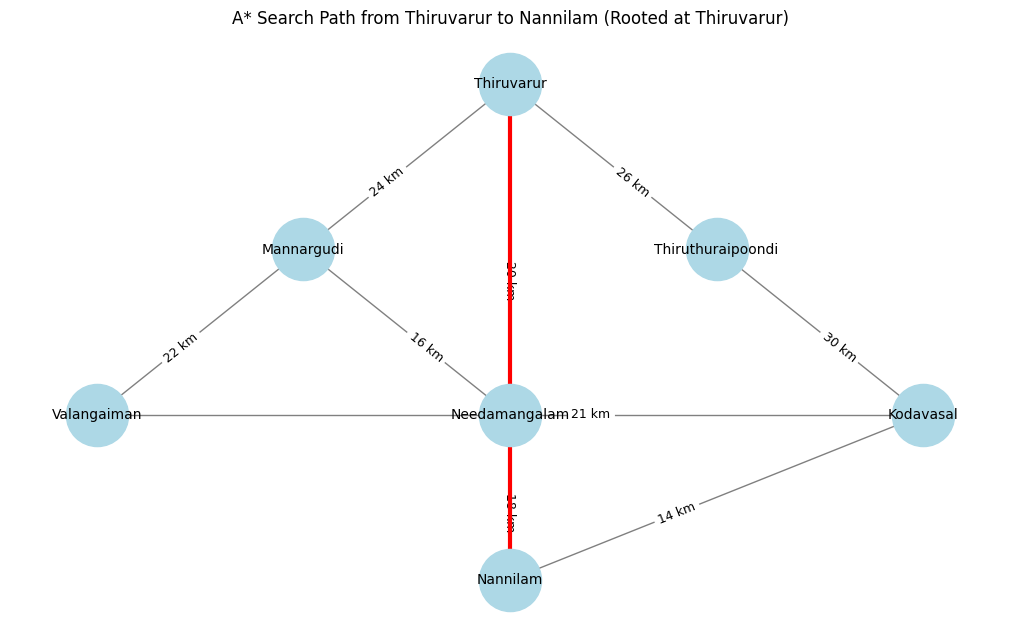

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Graph with distances (in km) and estimated travel time (in hours)
graph = {
    'Thiruvarur': {'Mannargudi': (24, 0.5), 'Thiruthuraipoondi': (26, 0.6), 'Needamangalam': (20, 0.5)},
    'Mannargudi': {'Thiruvarur': (24, 0.5), 'Valangaiman': (22, 0.5), 'Needamangalam': (16, 0.4)},
    'Thiruthuraipoondi': {'Thiruvarur': (26, 0.6), 'Kodavasal': (30, 0.7)},
    'Needamangalam': {'Thiruvarur': (20, 0.5), 'Mannargudi': (16, 0.4), 'Nannilam': (18, 0.5)},
    'Valangaiman': {'Mannargudi': (22, 0.5), 'Kodavasal': (21, 0.6)},
    'Kodavasal': {'Thiruthuraipoondi': (30, 0.7), 'Valangaiman': (21, 0.6), 'Nannilam': (14, 0.3)},
    'Nannilam': {'Needamangalam': (18, 0.5), 'Kodavasal': (14, 0.3)}
}

# Heuristic: Approximate distance (km) + estimated time (hrs) to goal
heuristic = {
    'Thiruvarur': 18 + 0.5, 'Mannargudi': 14 + 0.4, 'Thiruthuraipoondi': 20 + 0.6,
    'Needamangalam': 10 + 0.4, 'Valangaiman': 16 + 0.5, 'Kodavasal': 6 + 0.3, 'Nannilam': 0
}

# A* Algorithm with Distance + Time
def a_star_search(start, goal):
    queue = [(0, 0, start, [])]  # (total_cost, distance_so_far, current_city, path)
    visited = set()

    while queue:
        cost, dist_so_far, city, path = heapq.heappop(queue)

        if city in visited:
            continue
        visited.add(city)
        path = path + [city]

        if city == goal:
            return path  # Return the optimal path

        for neighbor, (dist, time) in graph.get(city, {}).items():
            new_cost = dist_so_far + dist + heuristic.get(neighbor, 0)
            heapq.heappush(queue, (new_cost, dist_so_far + dist, neighbor, path))

    return None

# Example: Finding the optimal path from 'Thiruvarur' to 'Nannilam'
optimal_path = a_star_search('Thiruvarur', 'Nannilam')

# Create a graph for visualization
G = nx.Graph()

# Add edges to the graph
for city, neighbors in graph.items():
    for neighbor, (dist, _) in neighbors.items():
        G.add_edge(city, neighbor, weight=dist)

# Custom positions for placing Thiruvarur at the root (top)
pos = {
    'Thiruvarur': (0, 3),
    'Mannargudi': (-1, 2),
    'Thiruthuraipoondi': (1, 2),
    'Needamangalam': (0, 1),
    'Valangaiman': (-2, 1),
    'Kodavasal': (2, 1),
    'Nannilam': (0, 0),
}

# Draw the graph (All nodes and edges)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, edge_color='gray')

# Draw edge labels **above the lines**
edge_labels = {(u, v): f"{d['weight']} km" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_color='black', label_pos=0.6)

# Highlight the optimal path in red **after labels are added**
if optimal_path:
    path_edges = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
    print("Optimal Path:", " ➝ ".join(optimal_path))
else:
    print("No path found.")

plt.title("A* Search Path from Thiruvarur to Nannilam (Rooted at Thiruvarur)")
plt.show()


In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  # Fix font warnings
